In [4]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn import linear_model


# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['FB','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [6]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,743.396150,749.140955,737.284426,743.239802,1836348.809524,743.239802
std,34.518287,33.573281,35.222677,34.226737,932891.609171,34.226737
min,667.849976,672.299988,663.059998,668.260010,586000.000000,668.260010
25%,716.072479,719.862503,706.364990,713.242493,1276675.000000,713.242493
50%,743.010010,747.089996,736.779999,742.845001,1587300.000000,742.845001
75%,773.075012,778.259995,768.255249,772.150024,2077850.000000,772.150024
max,816.679993,816.679993,805.140015,813.109985,6348100.000000,813.109985


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-12-28 to 2016-12-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


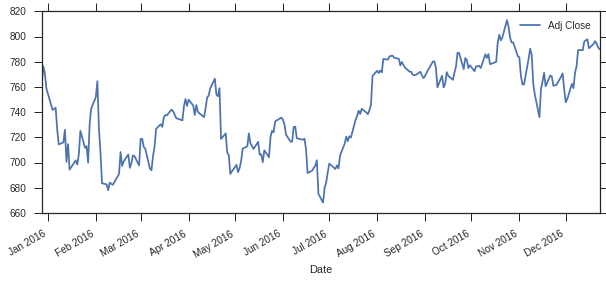

In [8]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

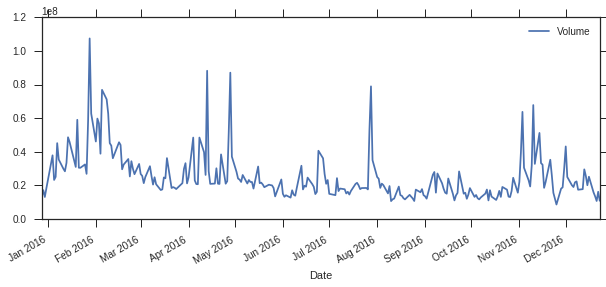

In [9]:
FB['Volume'].plot(legend=True,figsize=(10,4))

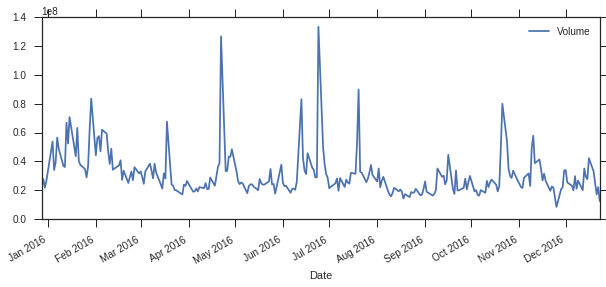

In [10]:
MSFT['Volume'].plot(legend=True,figsize=(10,4))

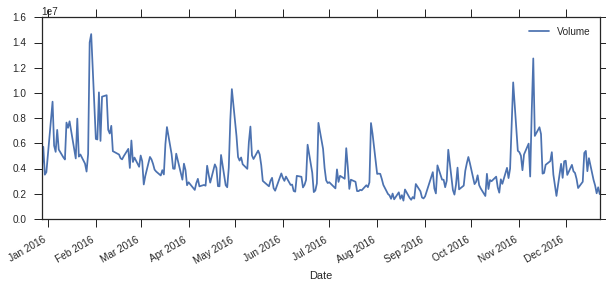

In [11]:
AMZN['Volume'].plot(legend=True,figsize=(10,4))

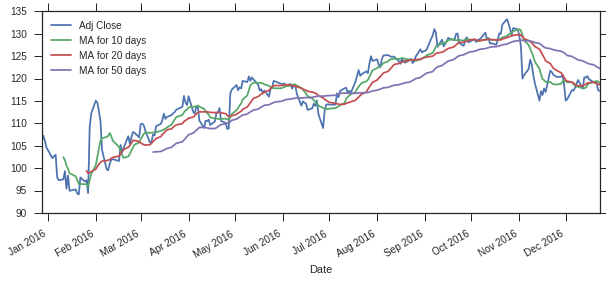

In [12]:
#plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    FB[column_name]=pd.rolling_mean(FB['Adj Close'],ma)

FB[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

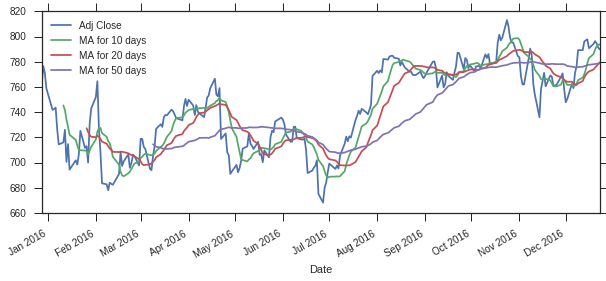

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name]=pd.rolling_mean( GOOG['Adj Close'],ma)

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

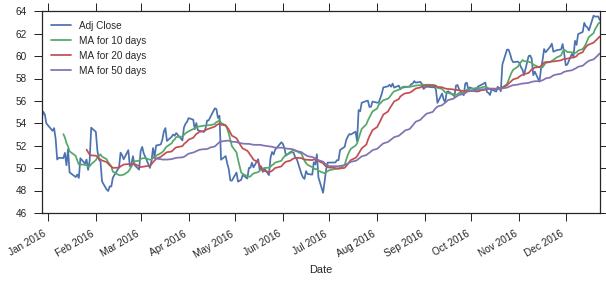

In [14]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name]=pd.rolling_mean(MSFT['Adj Close'],ma)

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

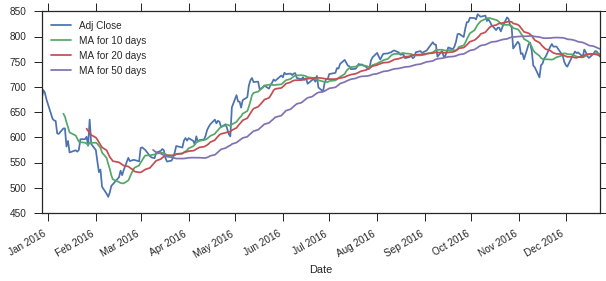

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name]=pd.rolling_mean(AMZN['Adj Close'],ma)

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

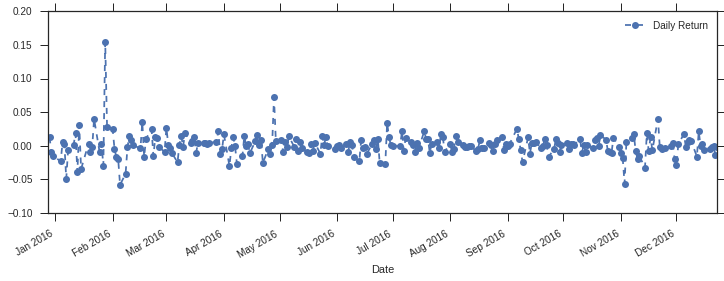

In [16]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
FB['Daily Return'] = FB['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
FB['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

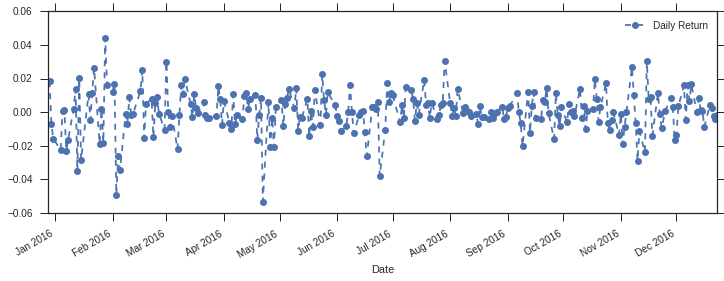

In [17]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

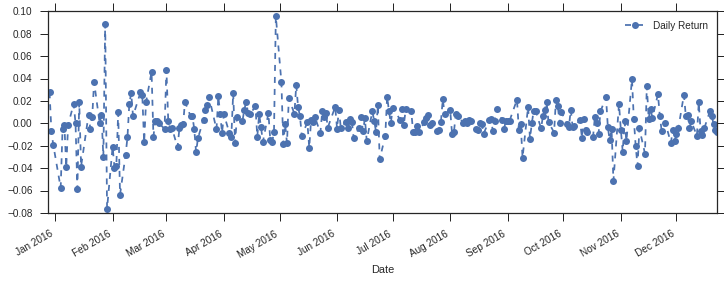

In [18]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AMZN['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [19]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
M['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

NameError: name 'M' is not defined

In [ ]:
#an overall look at the average daily return using a histogram.
#We'll use seaborn to create both a histogram and kde plot on the same figure.


In [ ]:
sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

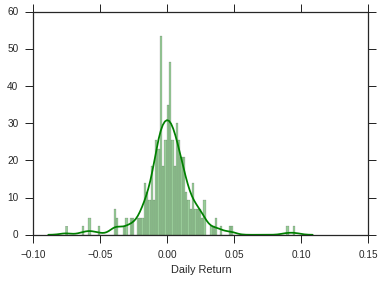

In [20]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='Green')

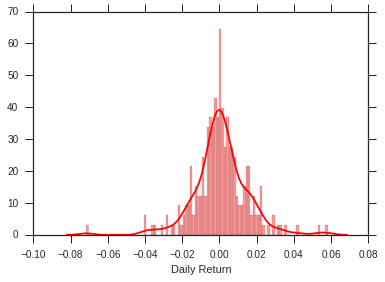

In [21]:
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='red')

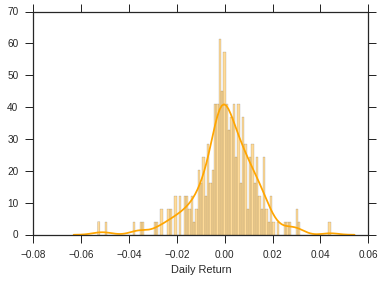

In [22]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='orange')

In [23]:
#printing correlation coefficient between GOOGLE and MSFT 
np.corrcoef(
    GOOG['Adj Close'],MSFT['Adj Close'])

array([[ 1.        ,  0.90613185],
       [ 0.90613185,  1.        ]])

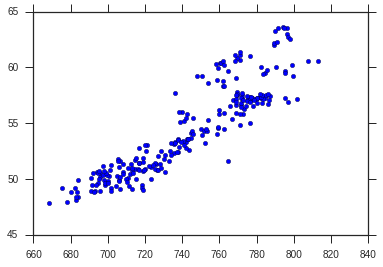

In [24]:

#plotting the relation between values of adjacent close of GOOGLE and MICROSOFT stock
plt.scatter(GOOG['Adj Close'],MSFT['Adj Close'])


('Coefficients: \n', array([[ 0.08988912]]))
Mean squared error: 13.99
Variance score: -2.79


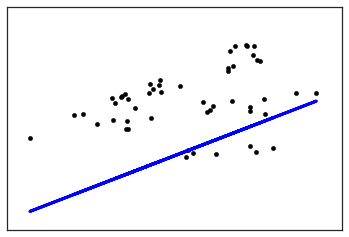

In [25]:
#We are finding the linear regression between GOOG and MSFT

# Split the data into training sets
x_train=GOOG['Adj Close'][:200]
y_train=MSFT['Adj Close'][:200]

# Split the data into testing sets
x_test=GOOG['Adj Close'][200:]
y_test=MSFT['Adj Close'][200:]


# Create linear regression object
regr = linear_model.LinearRegression()

x_train=x_train.reshape((200,1))
y_train=y_train.reshape((200,1))
# Train the model using the training sets
regr.fit(x_train, y_train)

x_test=x_test.reshape((len(x_test),1))
y_test=y_test.reshape((len(y_test),1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, regr.predict(x_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [26]:
GOOG['Adj Close'].count()


252

In [27]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['FB','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [28]:
closing_df.head()

,AMZN,FB,GOOG,MSFT
Date,,,,
2015-12-28,675.200012,105.930000,762.510010,54.455724
2015-12-29,693.969971,107.260002,776.599976,55.039699
2015-12-30,689.070007,106.220001,771.000000,54.806110
2015-12-31,675.890015,104.660004,758.880005,53.998276
2016-01-04,636.989990,102.220001,741.840027,53.336436


In [29]:
tech_rets = closing_df.pct_change()

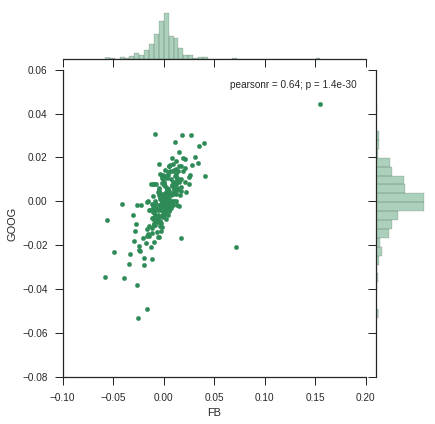

In [32]:
# Comparing Google to FB should 
sns.jointplot('FB','GOOG',tech_rets,kind='scatter',color='seagreen')

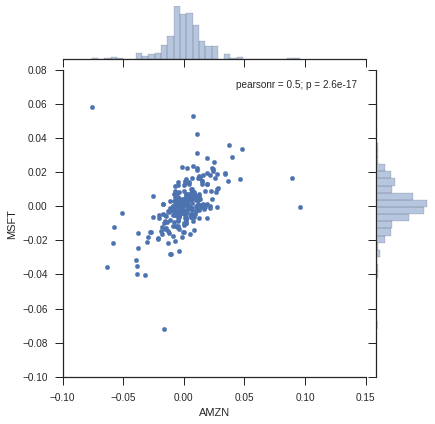

In [33]:
#use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot('AMZN','MSFT',tech_rets,kind='scatter')

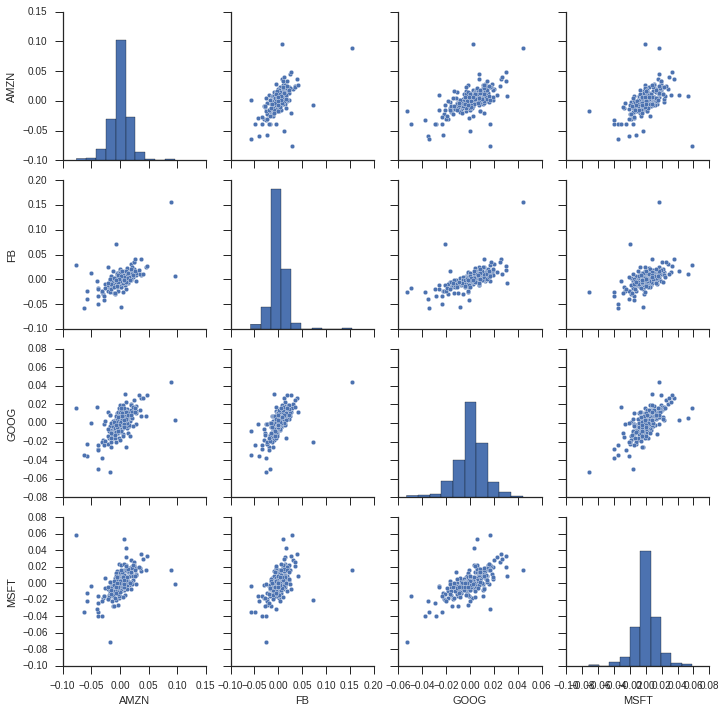

In [34]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

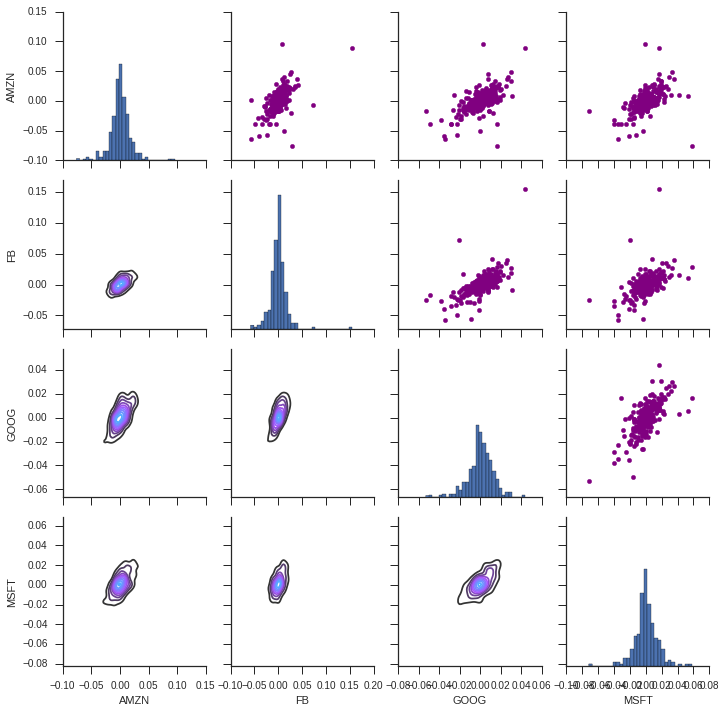

In [35]:
#sns.PairGrid() for full control of the figure, including what kind of plots go 
#in the diagonal, the upper triangle, and the lower triangle.

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

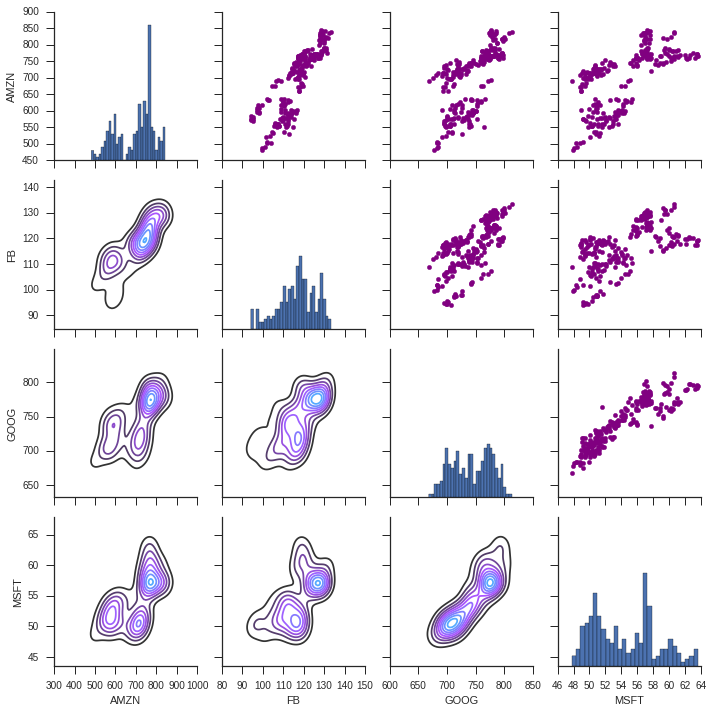

In [36]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

/home/irfanalidv/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/irfanalidv/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


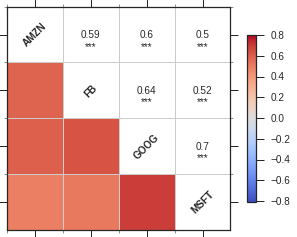

In [37]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)